In [2]:
from scipy import stats
import numpy as np
import math
import matplotlib.pyplot as plt

# Notes

This notebook is meant to serve as graphical support for Tutorial 5A. It is relevant for the following exercises:
- 4
- 7

There is also a section on the Central Limit Theorem.

# Approximating discrete rvs with continuous rvs

## Poisson

### Generating random numbers

In [10]:
# Parameters for the Poisson distribution
mu_h = 6
working_hours = 10
mu_d = mu_h * working_hours

# Generating 10000s random values from a Poisson distribution
n = 10000
newspapers = stats.poisson.rvs(mu_d, size = n)

### Plottting

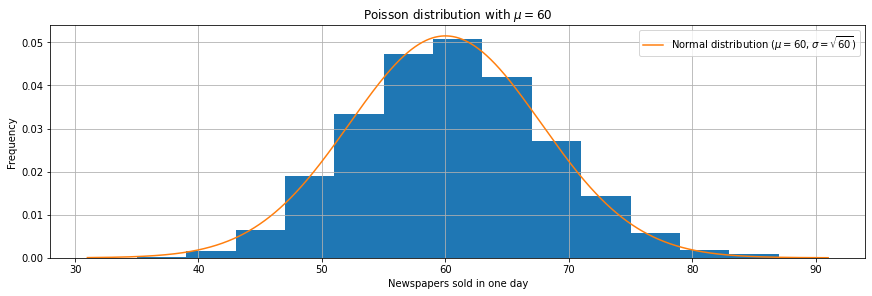

In [17]:
# Instantiate canvas
fig, ax = plt.subplots(figsize = (12, 4), constrained_layout = True)

# Style canvas
ax.set_title("Poisson distribution with $\mu = 60$")
ax.set_ylabel("Frequency")
ax.set_xlabel("Newspapers sold in one day")
ax.grid()

# Plot histogram
ax.hist(newspapers, bins = 15, density = True)

# Overlap a normal distribution
mu_norm = mu_d
sigma_norm = math.sqrt(mu_d)

lower_bound_x = np.min(newspapers)
upper_bound_x = np.max(newspapers)

x = np.linspace(lower_bound_x, upper_bound_x, 1000)
y = stats.norm.pdf(x, loc = mu_norm, scale = sigma_norm)
ax.plot(x, y, label = "Normal distribution ($\mu = 60, \sigma = \sqrt{60}$)")

ax.legend(loc = 1)

output = None

### Explanations

It seems indeed that we can approximate a variable $Y \sim POI(\mu)$ with a varibale $Y^{cc} \sim N(\mu = \mu, \sigma = \sqrt{\mu})$.

## Binomial

### Generating random numbers

In [4]:
# Parameters for the Binomial distribution
n_bin = 110
p = 0.9

# Generating 10000s random values from a Binomial distribution
n = 10000
xs = stats.binom.rvs(n_bin, p, size = n)

# Parameters for the Normal distribution
mu_norm = n_bin * p
sigma_norm = math.sqrt(n_bin * p * (1 - p))

# Generating 10000s random values from a Normal distribution
norms = stats.norm.rvs(loc = mu_norm, scale = sigma_norm, size = n)

### Plotting

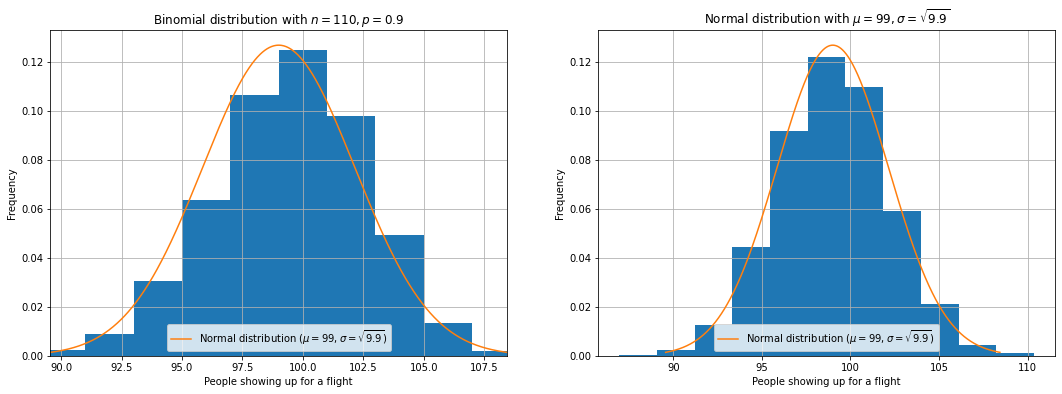

In [15]:
# Instantiate canvas
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# Style canvas

lower_bound_x = mu_norm - 3 * sigma_norm
upper_bound_x = mu_norm + 3 * sigma_norm

ax[0].set_xlim([lower_bound_x, upper_bound_x])

ax[0].set_title("Binomial distribution with $n = 110, p = 0.9$")
ax[1].set_title("Normal distribution with $\mu = 99, \sigma = \sqrt{9.9}$")

ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")

ax[0].set_xlabel("People showing up for a flight")
ax[1].set_xlabel("People showing up for a flight")

ax[0].grid()
ax[1].grid()

# Plot histogram
ax[0].hist(xs, bins = 11, density = True)
ax[1].hist(norms, bins = 11, density = True)

# Overlap a normal distribution
x = np.linspace(lower_bound_x, upper_bound_x, 1000)
y = stats.norm.pdf(x, loc = mu_norm, scale = sigma_norm)
ax[0].plot(x, y, label = "Normal distribution ($\mu = 99, \sigma = \sqrt{9.9}$)")
ax[1].plot(x, y, label = "Normal distribution ($\mu = 99, \sigma = \sqrt{9.9}$)")

ax[0].legend()
ax[1].legend()

output = None

### Explanation

It seems indeed that we can approximate a discrete random variable $Y \sim BIN(n, p)$ with a continuous random variable $Y^{cc} \sim N(\mu = n\cdot p, \sigma = \sqrt{n \cdot p \cdot (1-p)})$.

# CLT

### Generating random numbers

In [16]:
# Parameters for the population; assume that the whole population contains 1000 values
population_size = 1000
mu = 0
sigma = 1

# Generating the values of the population
population_values = stats.norm.rvs(loc = mu, scale = sigma, size = population_size)

# Sampling 1000 times samples of size n, where n = 10, 15, 30, 50, 100, from the population and computing the mean
simulations = 1000
ns = [10, 30, 75, 100]

# sample_means is a matrix with n rows and m columns, where
# m : 
sample_means = np.zeros(shape = (len(ns), simulations)) 

for i in range(len(ns)):
    for j in range(simulations):
        sample = np.random.choice(population_values, size = ns[i])
        sample_means[i, j] = np.mean(sample)

### Plotting

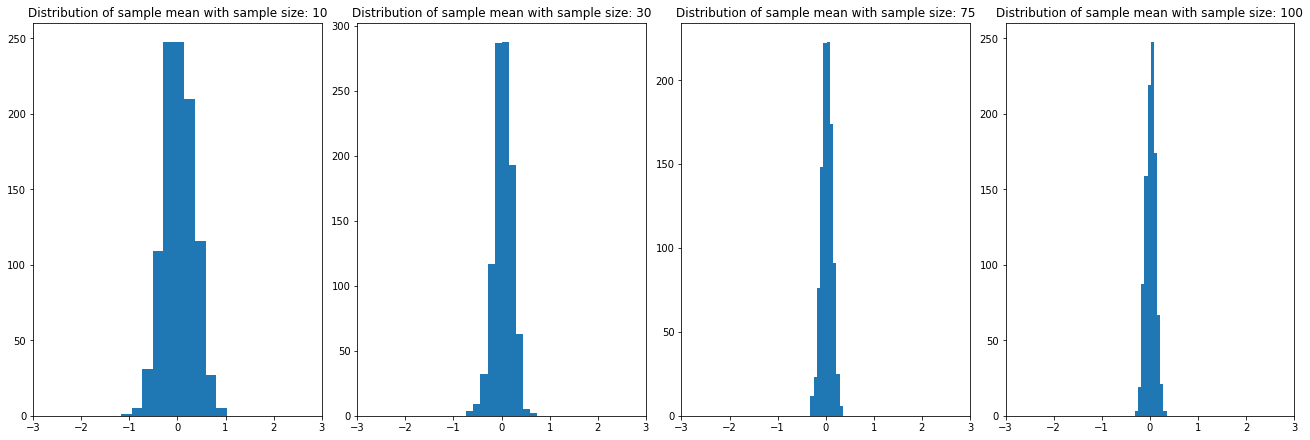

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = len(ns), figsize = (18, 6), constrained_layout = True)

for i in range(len(ns)):
    ax[i].hist(sample_means[i, :])
    ax[i].set_xlim([mu - 3 * sigma, mu + 3 * sigma])
    ax[i].set_title(f"Distribution of sample mean with sample size: {ns[i]}")

### Explanations